# Ejercicio 1 - Web scraping
Web scraping en la web de 20minutos. Recordad instalar las librerías necesarias.

La plantilla se corresponde con los ejemplos vistos en clase esta semana y que están disponible en las transparencias. Además, los comentarios en el código os dan pistas sobre lo que se hace en cada momento.

Este código no es universal. Podéis realizar cualquier mejora o cambio de código para obtener otro resultado. En ese caso debéis comentar cuál sería vuestro objetivo.

Por favor, tened siempre en cuenta las condiciones legales de la página web que queráis usar.

Podéis consultarme cualquier duda o enviarme vuestras soluciones a mi correo electrónico gmunoz4@us.es.

Rellenar los huecos para:

1) Obtener la información deseada de la página

2) Crear un archivo csv a partir de los datos obtenidos

In [31]:
# -*- coding: utf-8 -*-
# Look at the terms and the robots.txt file
# http://www.20minutos.es/robots.txt
from bs4 import BeautifulSoup  # BeautifulSoup package
import unicodecsv  # unicodecsv package
# If the package is not installed, install it using pip:
# !pip install unicodecsv

import datetime
import requests  # requests package

In [32]:
url = "http://www.20minutos.es"
# BeautifulSoup object
soup = BeautifulSoup(requests.get(url).text)

C:\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [33]:
links = []
# We look for the news.
all_news_lines = soup('div', 'sep-top')
for line in all_news_lines:
    # For each line, we look for 'a' elements
    link = line.find('a')
    # We store the link in the array
    links.append(link)
print(links)

[<a class="photo" href="http://www.20minutos.es/noticia/2921087/0/podemos-crece-division-interna-campana-contra-inigo-errejon/" title="Crece la división interna en Podemos tras la campaña de los pablistas contra Errejón"><img alt="Íñigo Errejón e Irene Montero" height="304" src="http://cdn.20m.es/img2/recortes/2016/05/13/281790-406-304.jpg?v=20161226163426" width="406"/>
<div class="photo-bar">
<span class="activity-button-little" style="opacity:0,475;" title="71% de actividad social"></span>
</div></a>, <a class="photo" href="http://www.20minutos.es/deportes/noticia/avion-chapecoense-poco-combustible-exceso-peso-2921157/0/" title="El avión del Chapecoense tenía poco combustible y exceso de peso"><img alt="Avión Chapecoense" height="180" src="http://cdn.20m.es/img2/recortes/2016/12/09/387718-240-180.jpg?v=20161213084136" width="240"/>
<div class="photo-bar">
</div></a>, <a class="photo" href="http://www.20minutos.es/noticia/2920421/0/correos-lanzara-convocatoria-2200-plazas-empleo-ugt-

In [34]:
csv_news = []
lenghts=[]
# For our csv, we store three columns: the text, the length and the date
csv_headers = ['text', 'date', 'length']
csv_news.append(csv_headers)

for link in links:
    # This is one option to get the date
    date_and_time = datetime.datetime.now()
    date = date_and_time.strftime('%d/%m/%Y')
    
    # We get the 'title' from the link
    new = link.get('title')
    #new = new.encode('utf-8')  # We need to encode for special chars
    
    # We get the text length
    number_of_letters = len(new)
    csv_news.append([new, date, number_of_letters])
    # Save lengths for show the histogram
    lenghts.append(number_of_letters)

In [35]:
# We write our csv
# We open a file to allow the write operation
import csv
ofile = open('20min.csv', 'w')
# We define our writer to write the rows
writer = csv.writer(ofile, delimiter=',')

for row in csv_news:
    # We use the try/catch to control the exceptions
    try:
        # We write the row in our csv file
        writer.writerow(row)
    except:
        pass

print("News saved!!")
ofile.close()

# End

News saved!!


[28, 35, 40, 41, 41, 43, 44, 46, 48, 49, 49, 50, 52, 52, 53, 54, 54, 55, 55, 56, 56, 56, 56, 56, 57, 57, 57, 61, 61, 61, 62, 63, 63, 63, 64, 64, 64, 67, 68, 69, 69, 71, 71, 71, 72, 72, 72, 73, 74, 75, 75, 78, 79, 81, 82, 82, 84, 85, 85, 85, 89, 90, 90, 92, 96, 98, 100, 113]


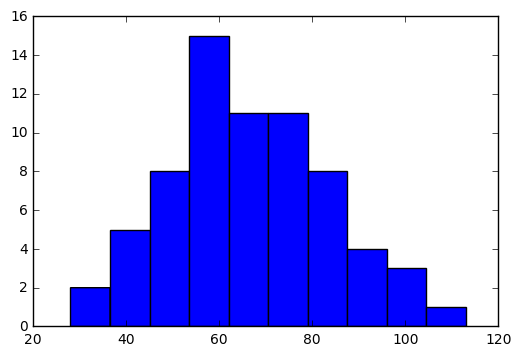

In [36]:
# plot histogram of lenghts
from matplotlib.pylab import hist, show
lenghts.sort()
print(lenghts)
hist(lenghts)
show()